
# Predicting Diabetes Risk Using Machine Learning

## Objective
The goal of this assignment is to apply machine learning techniques for predicting the risk of diabetes in individuals based on various health indicators. You will also evaluate the performance of your model using different evaluation metrics to ensure its reliability and effectiveness.

## Dataset
This assignment will use the **Pima Indians Diabetes Database**, which comprises diagnostic measurements related to diabetes among Pima Indian women. Features include the number of pregnancies, BMI, insulin level, age, and others.

## Tasks
You will go through the following tasks:
1. Data Preparation
2. Feature Engineering
3. Model Training
4. Model Evaluation

Ensure to follow the detailed steps provided under each task and fill in the code in the empty code cells.



## Dataset Details
The Pima Indians Diabetes Database includes the following features:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Please explore the dataset further with exploratory data analysis.


### Task 1: Data Preparation

1. Load the dataset using pandas.

In [79]:
# Import the Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_column",None)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [80]:
# Store the Data in Dataframe Using Pandas
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Perform a brief exploratory data analysis (EDA) to understand the dataset's characteristics.

In [15]:
# Checking Null Values in Dataset
df.isnull().sum()
# There is No Null Values in Dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Checking the Data Types of Variable
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
#Print the Column Name that are in Dataset
Col_Name = df.columns
print(f"Columns are :", Col_Name)

Columns are : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [18]:
# Analyse the Statistical Summary of Numerical Column in Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

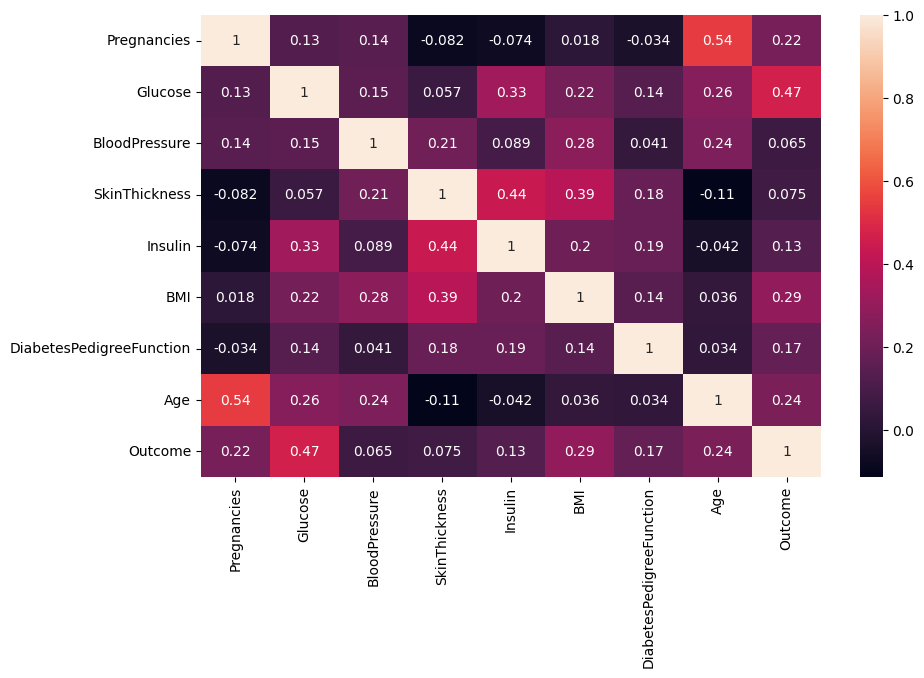

In [19]:
# Analyse the Correlation of Numerical Varibale & Analyse the Relation Between Them
plt.figure(figsize=(10,6)) #Fixed the Plot Size (10 Inches, 6 Inches)
Correlation = df.corr() #Correlation of Data
sns.heatmap(Correlation,annot=True) #Print Heatmap to Visualy Analyse the Correlation
plt.xticks(rotation=90)

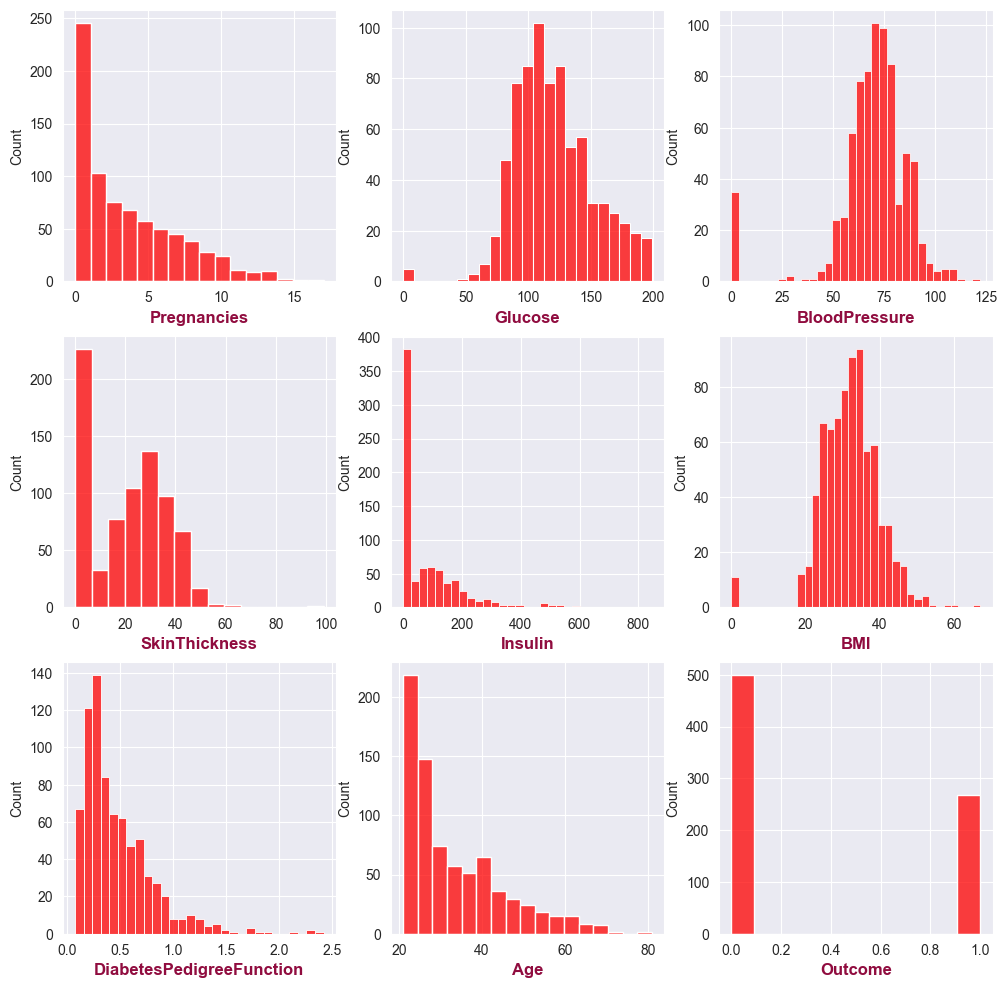

In [20]:
# Plot Histplot to Visualization Represent of Distribution of Numeric Data
i = 1
sns.set_style("darkgrid")
plt.figure(figsize=(12,12)) #Set Plot Size
for col in Col_Name: #Run a Loop to Show All the Varibale at Once.
    plt.subplot(3,3,i) #3 Rows, 3 Columns, i Represent the Location of Plot that is 1 to 9
    sns.histplot(df[col],color="red") #Histplot Code
    plt.xlabel(col,fontweight="heavy",fontsize=12,color="#900C3F") #Lable for Every Columns
    i+=1


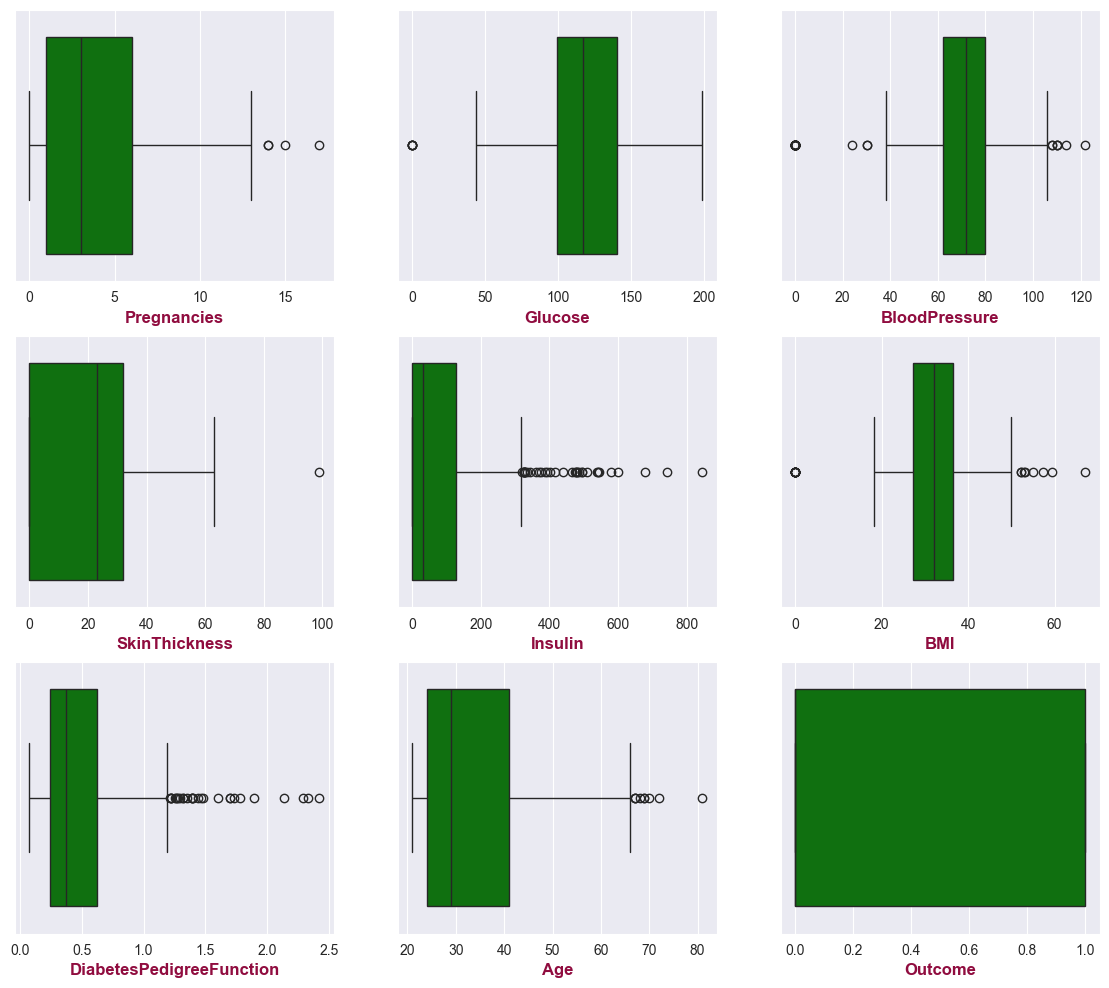

In [21]:
#Plot the Box Plot to Visulaization Represent of Outliers in Each Column
i = 1
plt.figure(figsize=(14,12)) #Plot size
for col in Col_Name:
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col],color="green") #Box Plot Code
    plt.xlabel(col,fontweight="heavy",fontsize=12,color="#900C3F") # Set Lables for Every Column
    i+=1

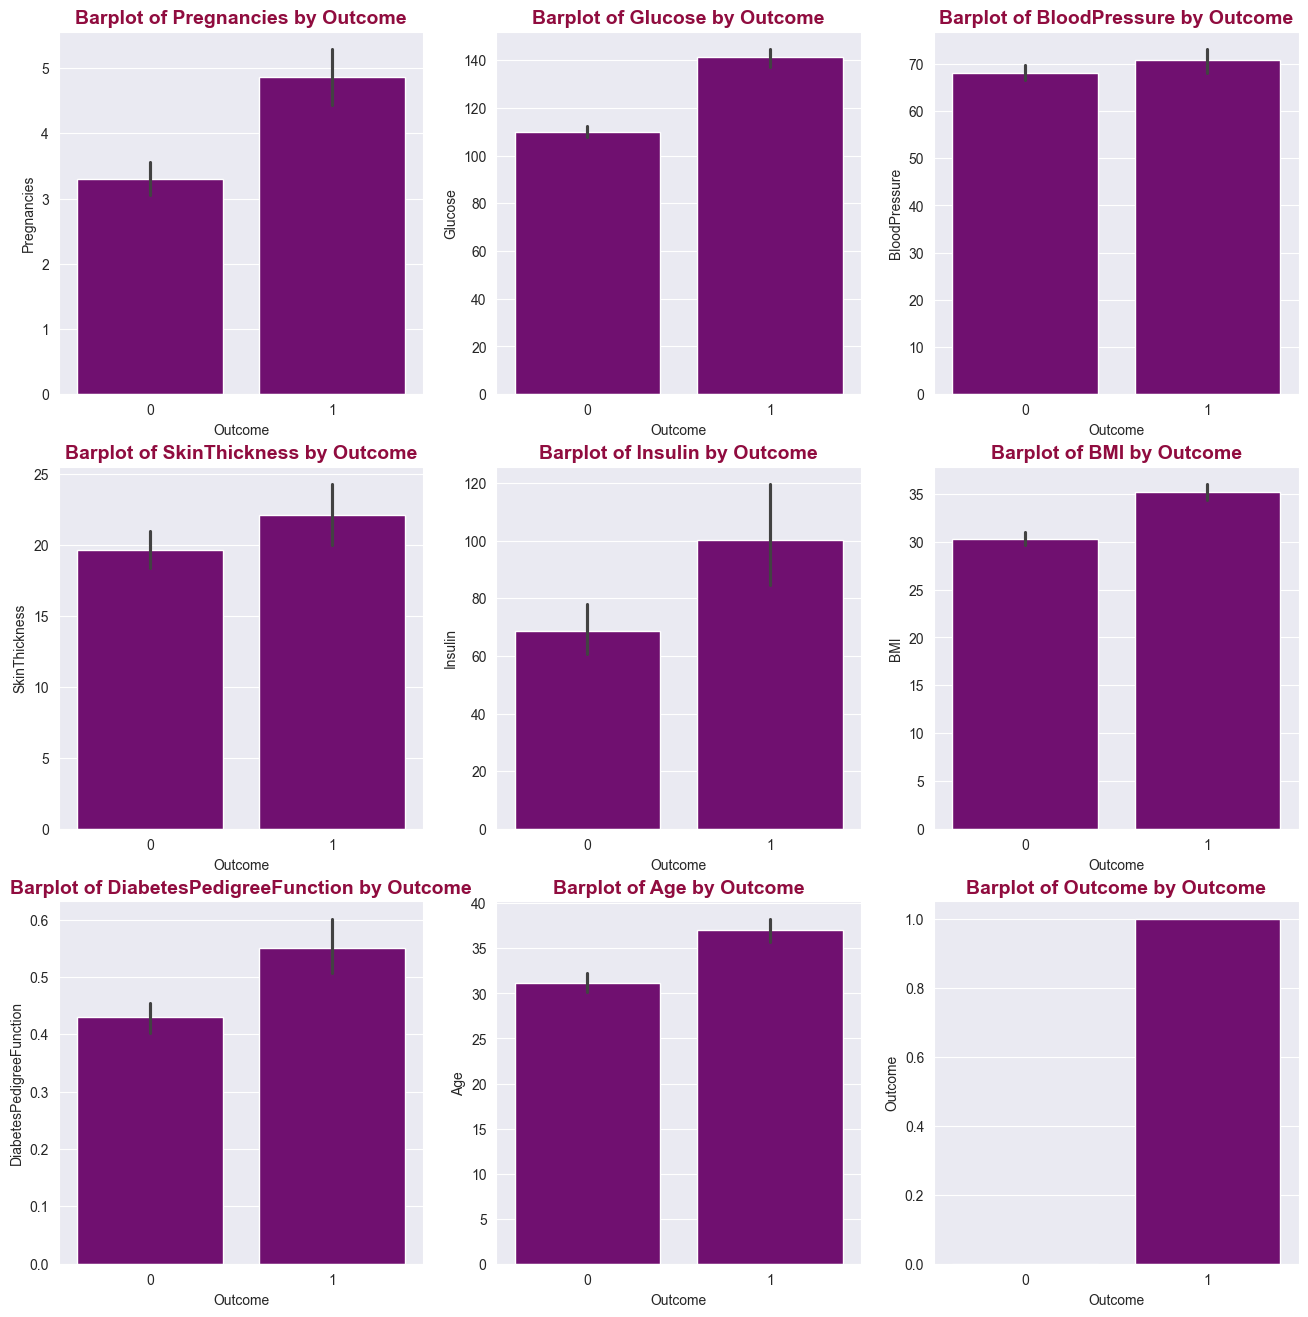

In [22]:
# Plot The Barplot to Show the Relation ship of Variable with Target Variable (Outcome). 
# It Show the Average Value of Each Outcome in Column
i = 1
plt.figure(figsize=(16,16)) #Plot SIze
for col in Col_Name:
    plt.subplot(3,3,i)
    sns.barplot(x="Outcome", y=df[col], data=df,color="purple") #Bar Plot Code
    plt.title(f"Barplot of {col} by Outcome",fontweight="heavy",fontsize=14,color="#900C3F") # Print Title for Every Column
    i+=1

# Conclution of EDA

Glucose and Diabetes
- Glucose and Diabetes Varibale are Highly Positive Correlated with 0.47, Can seen in Heatmap
- After That, BMI, AGE and Pregnency is also Correlated with Diabetes. 

Most of the Data is Skewed               
- Pregnancies Variable's data is Right Skewed     
- Skin Thickness Right Skewed      
- Insulin is Right Skewed     
- Diabetes predigree Function is Right Skewed    
- Age is Also Right Skewed

Outliers : 
- Insulin, BMI and Diabetes Predigree Function Have lot of Outliers

Relationshipt of Variable With Outcome :
- Pregnancies : Pregnencies is Positively affected by Diabetes. Who Have Pregnancy Have More Chance of Diabetes.
- Glucose : Glucose is Positively affected by Diabetes. Who Have High Glucose, Have More Chances of Diabetes.
- Blood Presure : Blood Presure is Not Correlated with Diabetes. 
- Skin Thickness : Skin Thickness is Not Much Correlaed with Diabetes
- Insullin : Insullin is Positively affected by Diabetes. Who Have High Insulin , Have more Chances of Diabetes
- Age : Who are Older in Age, Have More Chance of Diabeties than Younger.

3. Split the dataset into training (60%), validation (20%), and testing (20%) sets.

In [81]:
# Split the Data into 3 Sets (Train,Test & Val). and Ratio is 60-20-20
Train,Test_Val = train_test_split(df,test_size=0.4,random_state=1) #60% data from whole dataset store in Train Dataset
Test, Val = train_test_split(Test_Val,test_size=0.5,random_state=1) #20-20 % data from Whole Dataset Store in Test & Val Dataset 

### Task 2: Feature Engineering

1. Identify numerical and categorical features.

In [82]:
# Identify The Numerical Column exept Target Varibale and Store in Variable
Numerical_Cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]
Numerical_Cols
#Every Column is Numerical

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [83]:
# Identify the Categorical Column and store in Variable
Categorical_Cols = [col for col in df.columns if df[col].dtypes=="O"]
Categorical_Cols
# None are Categorical Column

[]

2. Standardize numerical features using `StandardScaler`.

In [96]:
# Scale the Data Using Sklearn Preprocession Fuction that is Standard Scaler. It Comprass the Data so that these Mean is 0 and Standard Deviation is 0
Scaler = StandardScaler()

3. Encode categorical features using `OneHotEncoder`, if any.

In [ ]:
# There is No categorical Column Except Target Column, So No Need to Encoder Them

4. Apply these transformations to the training, validation, and testing datasets.

In [85]:
# Filter the Input and Output Column and store in Variable
Input = list(df.columns[:-1])
Output = "Outcome"

In [98]:
# Store the Input and Output Varibale in Train, Test and Val Varibale Seperately
X_Train = Train[Input] #Input of Training Data
Y_Train = Train[Output] # Output of Training Data
X_Test = Test[Input] #Input of Testing  Data
Y_Test = Test[Output] #Output of Testing Data
X_Val = Val[Input] #Input of Val Data
Y_Val = Val[Output] #Output of Val Data

In [99]:
# Scale the Data Numerical Data using Standard Scaler
Scaler.fit(X_Train) #Fit/train
X_Train_Scaled = Scaler.transform(X_Train)
X_Test_Scaled = Scaler.transform(X_Test)
X_Val_Scaled = Scaler.transform(X_Val)

In [100]:
# Store Data in Dataframe After Scaling, Because Scaler Gives the Output in Numpy Array
X_Train_Scaled = pd.DataFrame(X_Train_Scaled, columns=X_Train.columns)
X_Test_Scaled = pd.DataFrame(X_Test_Scaled, columns=X_Test.columns)

In [101]:
#Checking the one of Scaled Data
X_Train_Scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.502434,0.070359,-0.062220,0.543362,1.166491,0.125312,1.233583,-0.266638
1,-1.101189,-0.243559,0.547826,0.920070,1.886282,1.633470,-0.904688,-0.516442
2,-0.502434,-0.400518,1.157871,-1.214613,-0.677972,1.433272,1.142979,1.731791
3,-1.101189,-0.274951,0.344477,-1.214613,-0.677972,0.178698,-0.569451,-0.849513
4,0.096322,-0.337735,0.141128,1.736273,1.184486,0.685866,2.788965,1.898326


### Task 3: Model Training

1. Train a logistic regression model on the training dataset.

In [102]:
#Train the Logistic Regression Model
LR_Model = linear_model.LogisticRegression()
LR_Model.fit(X_Train_Scaled,Y_Train)


LogisticRegression()

2. Provide a rationale for choosing logistic regression.

In [ ]:
# The Output Variable of Out Data is Categorical with only Two Values. So in This Type of Data When We Have to Predict the Categorical
# Values, Logistic Regression Make More Sense.

# Logistic Regression Straight Forward Understand the Relationship between the Feature and Probability of Outcome

# Logistic Regression Understand the Large Dataset Compare to Complex Models like Neural Networks.

### Task 4: Model Evaluation

1. Evaluate the model on the validation set using Accuracy, Precision, Recall, F1 Score, and AUC-ROC.

In [103]:
# Predict the Output Base on Test Dataset. Then Compare to Testing Output to Calculate the Model Performance
Y_Pred = LR_Model.predict(X_Test_Scaled)
Y_Pred 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [104]:
#Accuracy Score
Accuracy = metrics.accuracy_score(Y_Test,Y_Pred)
Accuracy

0.7857142857142857

In [105]:
# Percision Score
Precision = metrics.precision_score(Y_Test, Y_Pred)
Precision

0.7954545454545454

In [106]:
# Recall Score
Recall = metrics.recall_score(Y_Test, Y_Pred)
Recall

0.5932203389830508

In [76]:
# F1 Score
F1_Score = metrics.f1_score(Y_Test, Y_Pred)
F1_Score

0.6796116504854369

In [77]:
# AUC_ROC Score
AucRoc = metrics.roc_auc_score(Y_Test,Y_Pred)
AucRoc

0.7492417484388939

2. Generate a confusion matrix for the validation set predictions.

In [64]:
# Confusion Matrix
Y_Pred_Val = LR_Model.predict(X_Val)
Confusion_Metrics = metrics.confusion_matrix(Y_Val,Y_Pred_Val)
Confusion_Metrics

array([[  0, 104],
       [  0,  50]], dtype=int64)

3. Discuss the implications of each metric in the context of diabetes prediction.

In [ ]:
#ANSWER BELOW :

- Accuracy_Score : Accuracy Score Measure the Performance Score of Model's Prediction. In Diabetes Dataset, It Caluate the 
                  Propotion of Correct Output both Diabetes Positive and Diabetes Negetive also


- Percision : Percision Measure the Ratio of Positive / True Predications to the Total Predicted Values. In Diabetes Dataset,
               Percision Show the Propotion of Correctly Predicted Diabetic Individuals among all the Individuals.

- Recall : It is also Known as Sensitivity. It Measure the Ratio of True Positive Prediction to the Actual Positives. 


- F1_Score : F1 is the Mean of Precision and Recall. It Show the Balance in Between the Both (Percision and Recall). It Consider
               Both False Positive and False Negetive.


- AUC-ROC : It Show the True Positive Rate against the False Positive Rate.

